In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

# Define the URL of the CSV file
file_id = '1WClX4TtAVny-bz7AI1VNrqeGlnzyXiam'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file using gdown
output = 'sampled_data_full_nl.csv'
gdown.download(url, output, quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(output)

# Display the last few rows of the DataFrame
df.tail()

Downloading...
From (original): https://drive.google.com/uc?id=1WClX4TtAVny-bz7AI1VNrqeGlnzyXiam
From (redirected): https://drive.google.com/uc?id=1WClX4TtAVny-bz7AI1VNrqeGlnzyXiam&confirm=t&uuid=1410f44e-e5b8-48ff-959c-19f770f0b6a1
To: /content/sampled_data_full_nl.csv
100%|██████████| 268M/268M [00:05<00:00, 53.5MB/s]


,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
1297807,6,5,0,0800-0859,7,1,37,150,JetBlue Airways,12427,...,8,Logan International,42.364,-71.006,NONE,0.0,0.0,0.0,77.0,14.32
1297808,10,3,0,1100-1159,4,3,5,76,SkyWest Airlines Inc.,5961,...,0,Washington Dulles International,38.942,-77.458,Detroit Metro Wayne County,0.0,0.0,0.0,96.0,6.04
1297809,5,3,0,1900-1959,2,5,9,70,Comair Inc.,2558,...,15,Bradley International,41.939,-72.683,Ronald Reagan Washington National,0.0,0.0,0.0,68.0,6.93
1297810,6,3,1,0700-0759,4,2,45,76,SkyWest Airlines Inc.,21878,...,4,Stapleton International,39.774,-104.880,Billings Logan International,0.0,0.0,0.0,83.0,7.83
1297811,6,2,0,0700-0759,3,1,13,173,United Air Lines Inc.,4615,...,6,Kansas City International,39.298,-94.714,NONE,0.0,0.0,0.0,84.0,9.40


Epoch 1/20
6490/6490 [==============================] - 19s 3ms/step - loss: 0.4669 - accuracy: 0.8092 - val_loss: 0.4517 - val_accuracy: 0.8160
Epoch 2/20
6490/6490 [==============================] - 19s 3ms/step - loss: 0.4548 - accuracy: 0.8120 - val_loss: 0.4492 - val_accuracy: 0.8175
Epoch 3/20
6490/6490 [==============================] - 17s 3ms/step - loss: 0.4475 - accuracy: 0.8153 - val_loss: 0.4491 - val_accuracy: 0.8169
Epoch 5/20
6490/6490 [==============================] - 19s 3ms/step - loss: 0.4448 - accuracy: 0.8161 - val_loss: 0.4482 - val_accuracy: 0.8173
Epoch 6/20
6490/6490 [==============================] - 17s 3ms/step - loss: 0.4424 - accuracy: 0.8172 - val_loss: 0.4476 - val_accuracy: 0.8171
Epoch 7/20
6490/6490 [==============================] - 17s 3ms/step - loss: 0.4399 - accuracy: 0.8179 - val_loss: 0.4496 - val_accuracy: 0.8157
Epoch 8/20
6490/6490 [==============================] - 16s 3ms/step - loss: 0.4373 - accuracy: 0.8191 - val_loss: 0.4484 - val_ac

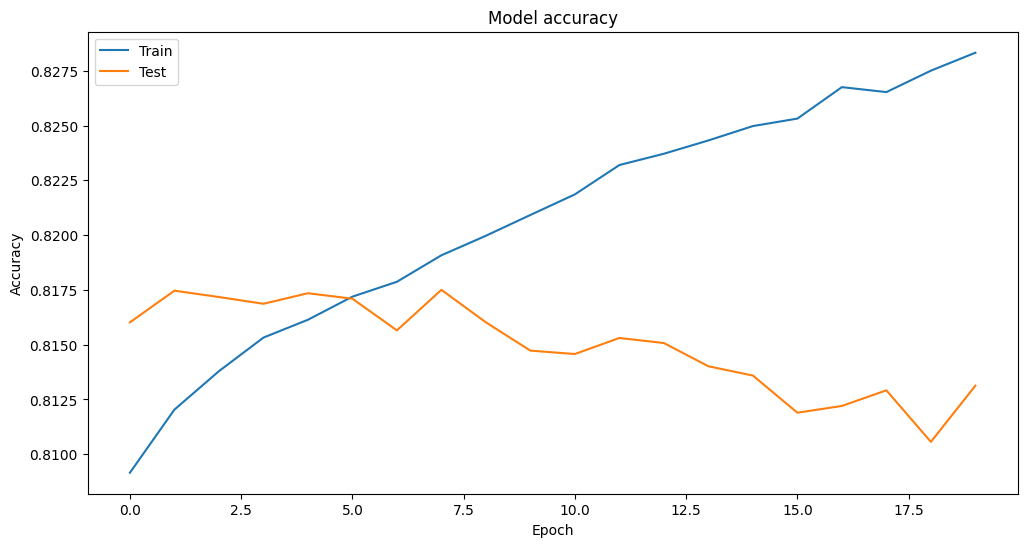

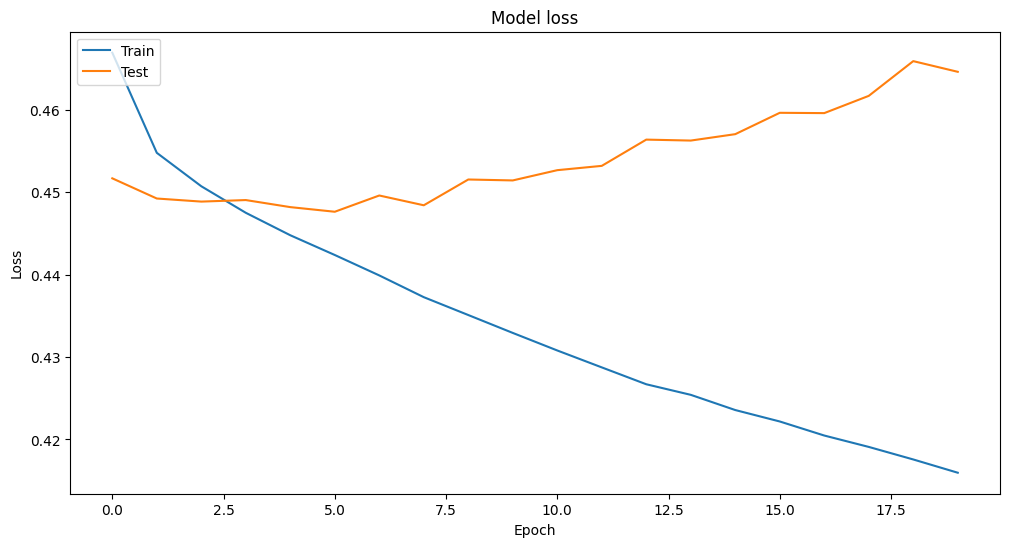

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Sample 20% of the data
data_sample = df.sample(frac=0.2, random_state=42)

# Define features and target
features = ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
            'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH',
            'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
            'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS',
            'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT',
            'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

# Prepare the data
X = data_sample[features]
y = data_sample['DEP_DEL15']

# Handle categorical variables
categorical_features = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Handle 'DEP_TIME_BLK' separately
X['DEP_TIME_BLK'] = X['DEP_TIME_BLK'].astype('category').cat.codes

# Make sure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values
X.dropna(inplace=True)
y = y[X.index]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the TensorFlow Neural Network
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

# Predict the labels of the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('\nConfusion Matrix:')
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/20
6490/6490 [==============================] - 29s 4ms/step - loss: 0.4660 - accuracy: 0.8096 - val_loss: 0.4513 - val_accuracy: 0.8168
Epoch 2/20
6490/6490 [==============================] - 30s 5ms/step - loss: 0.4548 - accuracy: 0.8123 - val_loss: 0.4500 - val_accuracy: 0.8174
Epoch 3/20
6490/6490 [==============================] - 28s 4ms/step - loss: 0.4509 - accuracy: 0.8141 - val_loss: 0.4497 - val_accuracy: 0.8169
Epoch 4/20
6490/6490 [==============================] - 28s 4ms/step - loss: 0.4478 - accuracy: 0.8147 - val_loss: 0.4487 - val_accuracy: 0.8181
Epoch 5/20
6490/6490 [==============================] - 27s 4ms/step - loss: 0.4445 - accuracy: 0.8163 - val_loss: 0.4493 - val_accuracy: 0.8158
Epoch 6/20
6490/6490 [==============================] - 30s 5ms/step - loss: 0.4418 - accuracy: 0.8176 - val_loss: 0.4495 - val_accuracy: 0.8167
Epoch 7/20
6490/6490 [==============================] - 25s 4ms/step - loss: 0.4389 - accuracy: 0.8188 - val_loss: 0.4514 - val_ac

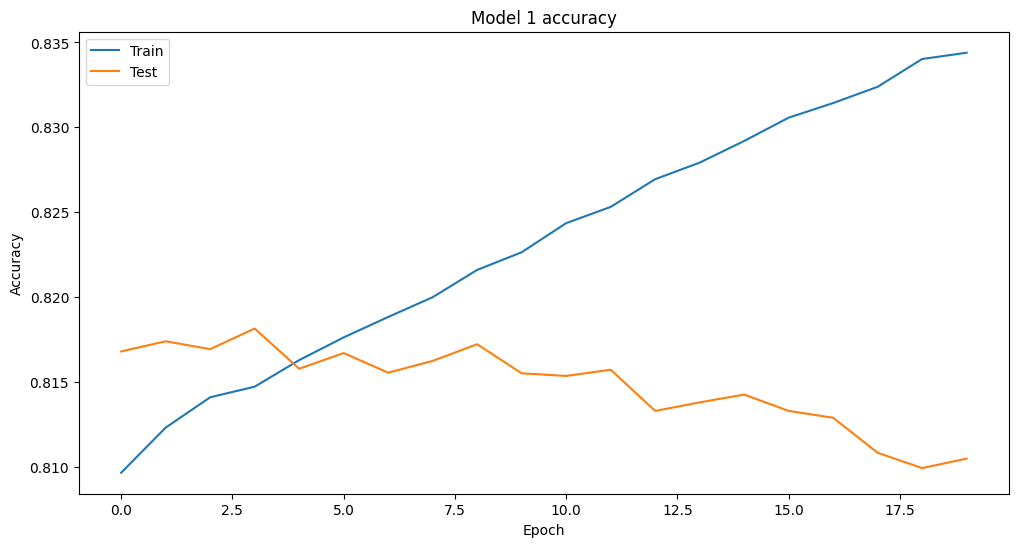

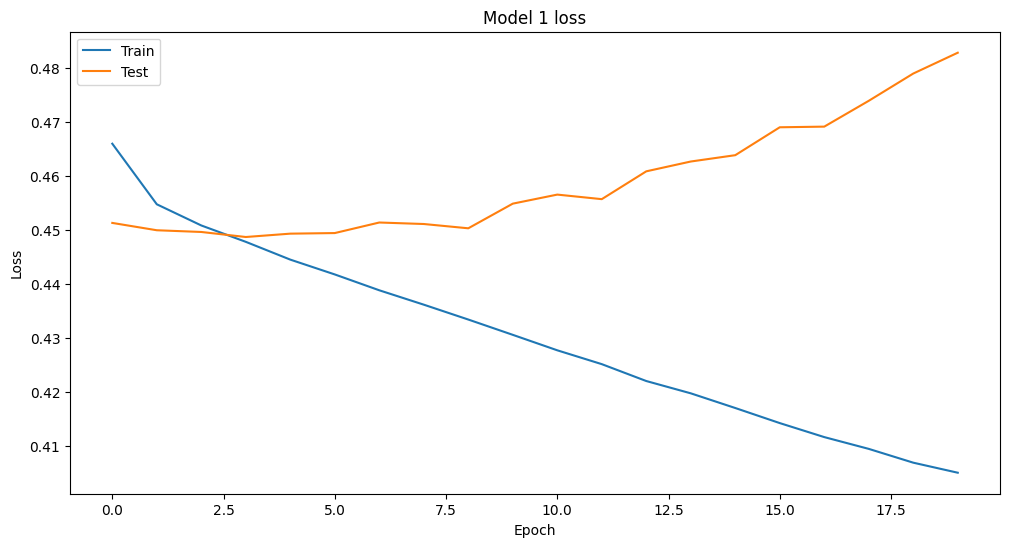

In [ ]:
# Model 1 - Increased Number of Neurons

# Sample 20% of the data
data_sample = df.sample(frac=0.2, random_state=42)

# Define features and target
features = ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
            'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH',
            'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
            'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS',
            'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT',
            'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

# Prepare the data
X = data_sample[features]
y = data_sample['DEP_DEL15']

# Handle categorical variables
categorical_features = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Handle 'DEP_TIME_BLK' separately
X['DEP_TIME_BLK'] = X['DEP_TIME_BLK'].astype('category').cat.codes

# Make sure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values
X.dropna(inplace=True)
y = y[X.index]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and compile the first TensorFlow Neural Network with increased number of neurons
import tensorflow as tf
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print('\nTest accuracy for Model 1:', test_acc1)

# Predict the labels of the test set
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")

# Generate a confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Print the confusion matrix
print('\nConfusion Matrix for Model 1:')
print(conf_matrix1)

# Print the classification report
class_report1 = classification_report(y_test, y_pred1)
print('\nClassification Report for Model 1:')
print(class_report1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/20
6490/6490 [==============================] - 28s 4ms/step - loss: 0.4653 - accuracy: 0.8100 - val_loss: 0.4526 - val_accuracy: 0.8164
Epoch 2/20
6490/6490 [==============================] - 26s 4ms/step - loss: 0.4548 - accuracy: 0.8124 - val_loss: 0.4498 - val_accuracy: 0.8177
Epoch 3/20
6490/6490 [==============================] - 25s 4ms/step - loss: 0.4510 - accuracy: 0.8141 - val_loss: 0.4487 - val_accuracy: 0.8172
Epoch 4/20
6490/6490 [==============================] - 23s 4ms/step - loss: 0.4482 - accuracy: 0.8149 - val_loss: 0.4507 - val_accuracy: 0.8174
Epoch 5/20
6490/6490 [==============================] - 24s 4ms/step - loss: 0.4454 - accuracy: 0.8160 - val_loss: 0.4500 - val_accuracy: 0.8160
Epoch 6/20
6490/6490 [==============================] - 23s 4ms/step - loss: 0.4431 - accuracy: 0.8168 - val_loss: 0.4483 - val_accuracy: 0.8175
Epoch 7/20
6490/6490 [==============================] - 21s 3ms/step - loss: 0.4408 - accuracy: 0.8178 - val_loss: 0.4515 - val_ac

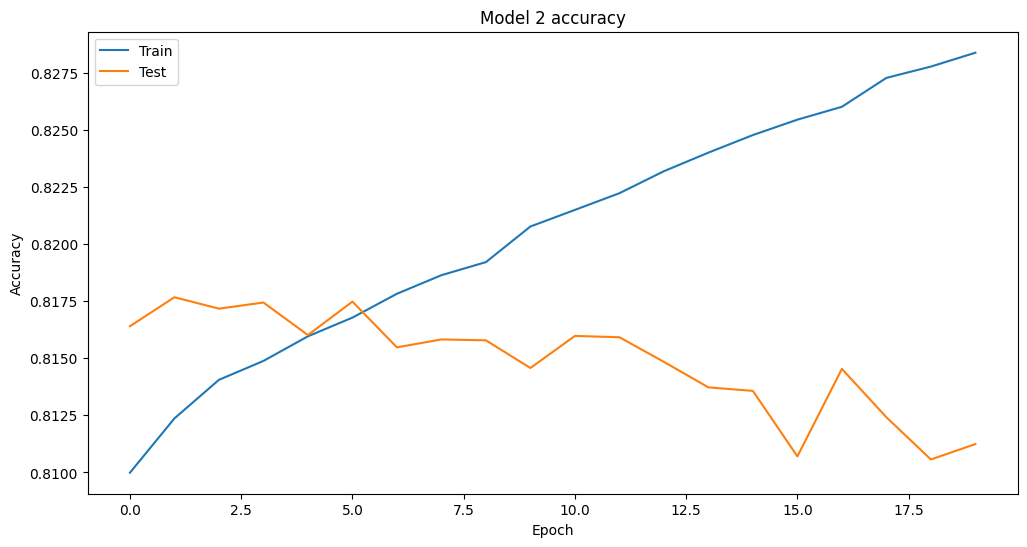

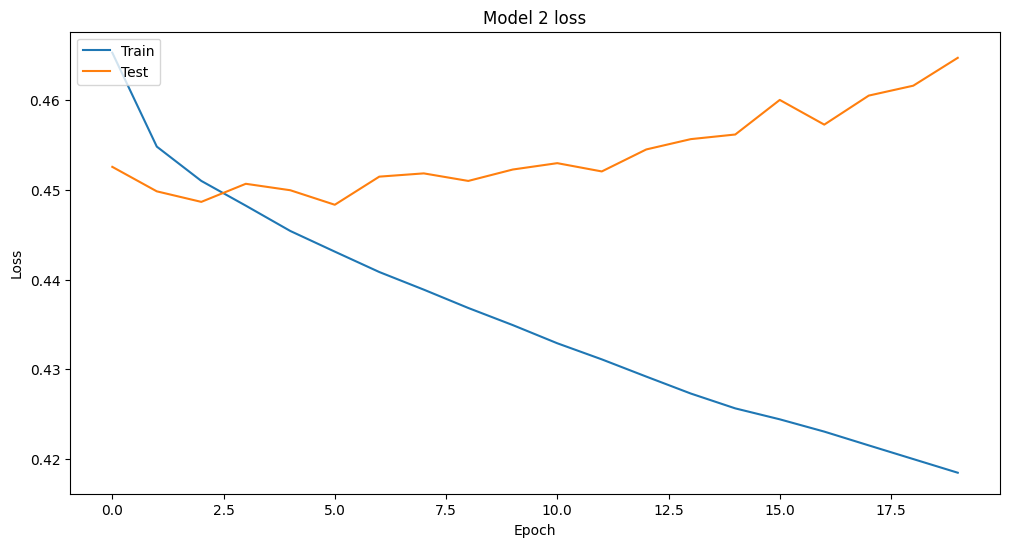

In [ ]:
# Model 2: Added Hidden Layer

# Sample 20% of the data
data_sample = df.sample(frac=0.2, random_state=42)

# Define features and target
features = ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
            'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH',
            'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
            'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS',
            'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT',
            'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

# Prepare the data
X = data_sample[features]
y = data_sample['DEP_DEL15']

# Handle categorical variables
categorical_features = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Handle 'DEP_TIME_BLK' separately
X['DEP_TIME_BLK'] = X['DEP_TIME_BLK'].astype('category').cat.codes

# Make sure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values
X.dropna(inplace=True)
y = y[X.index]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and compile the second TensorFlow Neural Network with an added hidden layer
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
print('\nTest accuracy for Model 2:', test_acc2)

# Predict the labels of the test set
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")

# Generate a confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Print the confusion matrix
print('\nConfusion Matrix for Model 2:')
print(conf_matrix2)

# Print the classification report
class_report2 = classification_report(y_test, y_pred2)
print('\nClassification Report for Model 2:')
print(class_report2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()